# RGR Stock Price Forecasting Project

Author: Jack Wang

---

## Problem Statement

Stock prices are hard to predict because they are not only affected by the performance of the underlying companies but also the expectations from the general public. As known, the stock price of firearm companies are highly correlated to the public opinions toward gun ban. My model intends to predict the stock price of one of the largest firearm company in the states, RGR (Sturm, Ruger & Co., firearm company), by using its historical stock price and public opinions toward gun ban. 

## Executive Summary

The goal of my projcet is to build a **time series regression model** that predicts the stock price of RGR. The data I am using would be historical stock price from Yahoo Finance, twitter posts scraped from [twitter](https://twitter.com/), and also the news articles from major news website. I will perform NPL on the text data and time series modeling on the historical stock price data. The model will be evaluated using R^2 score.

## Content

This project consists of 5 Jupyter notebooks:
- ***Part-1-stock-price-data***
- Part-2-twitter-scraper
- Part-3-twitter-text-data
- Part-4-combined-data-and-EDA
- Part-5-modeling
    - [Example](#Most-Frequent-Words-in-Title-and-Content)
- Part-6-Conclusion-and-Discussion


---


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [83]:
df = pd.read_csv("./RGR-2014-2018.csv")

In [84]:
df.shape

(1258, 7)

In [85]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [86]:
df['Date'] = pd.to_datetime(df['Date'])

In [87]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [88]:
# Write function called plot_series that takes in 
# a dataframe, a list of column names to plot, the 
# plot title and the axis labels as arguments,
# then displays the line plot with a figure size
# of 18 horizontal inches by 9 vertical inches.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

In [89]:
df = df.set_index('Date')

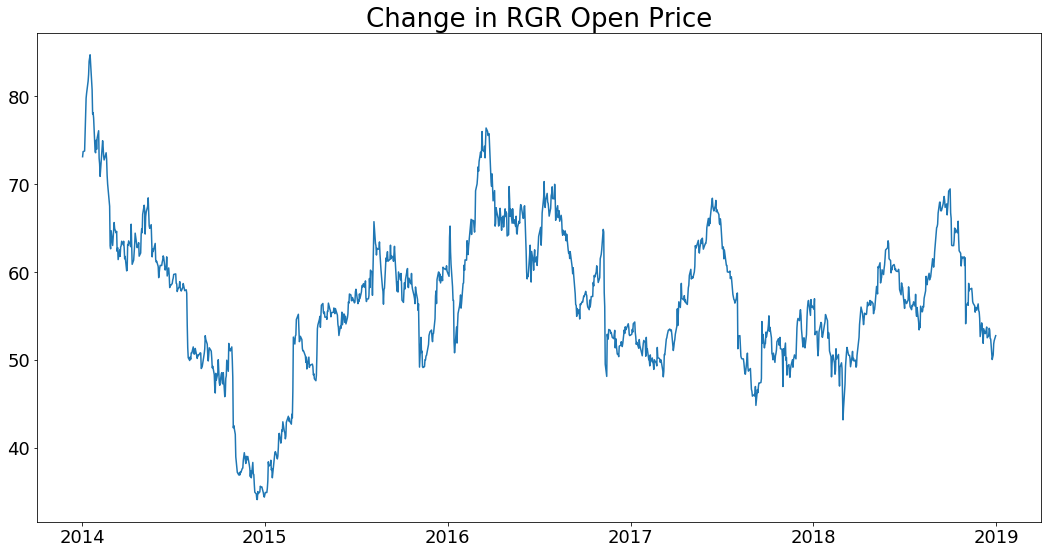

In [90]:
plot_series(df, ['Open'], title ='Change in RGR Open Price')

In [92]:
df['2018'].shape

(251, 6)

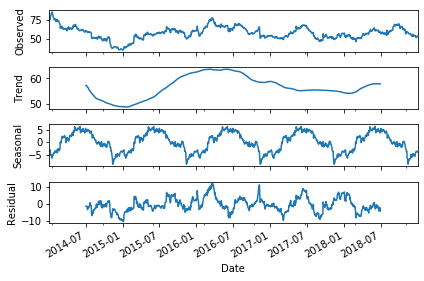

In [93]:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(df['High'], freq = 252)
# Plot the decomposed time series.
decomp.plot();